### Data Downloaded from Wikidata SPARQL query on Non-Acting Oscar Nominees & Winners
* may not include producers for Best Picture

In [3]:
import numpy as np
import os
import pandas as pd
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
oscar_nominees = pd.read_csv('my_data/oscarnomineesnobestpic.csv')
oscar_nominees.head()

,humanLabel,genderLabel,nominationLabel,year
0,Charlie Chaplin,male,"Academy Award for Best Writing, Original Scree...",1948
1,Charlie Chaplin,male,"Academy Award for Best Writing, Original Scree...",1941
2,Peter Jackson,male,"Academy Award for Best Writing, Original Scree...",1995
3,Michel Hazanavicius,male,"Academy Award for Best Writing, Original Scree...",2012
4,Sylvester Stallone,male,"Academy Award for Best Writing, Original Scree...",1977


In [5]:
# check gender values
oscar_nominees.genderLabel.value_counts()

male          8543
female        1025
non-binary       1
Name: genderLabel, dtype: int64

In [6]:
oscar_nominees.query('genderLabel == "non-binary"')

,humanLabel,genderLabel,nominationLabel,year
3058,Sam Smith,non-binary,Academy Award for Best Original Song,2016


In [7]:
oscar_nominees.shape

(9600, 4)

In [8]:
oscar_nominees.nominationLabel.value_counts()

Academy Award for Best Sound Mixing                         1049
Academy Award for Best Production Design                     731
Academy Award for Best Writing, Adapted Screenplay           661
Academy Award for Best Writing, Original Screenplay          623
Academy Award for Best Film Editing                          542
Academy Award for Best Visual Effects                        504
Academy Award for Best Director                              442
Academy Award for Best Animated Short Film                   425
Academy Award for Best Documentary (Short Subject)           411
Academy Award for Best Art Direction, Black and White        380
Academy Award for Best Live Action Short Film                379
Academy Award for Best Art Direction, Color                  371
Academy Award for Best Cinematography                        320
Academy Award for Best Costume Design                        289
Academy Award for Best Original Score                        283
Academy Award for Best Ma

In [ ]:
# not sure why Foreign Language Film & Best Original Song have such low numbers. . . 

In [14]:
# remove 'Academy Award for Best' from each value
award_string = 'Academy Award for Best Cinematography, Color'
split_award_string = award_string.split(' ')
condensed_award_string = split_award_string[4:]
condensed_award_string

['Cinematography,', 'Color']

In [15]:
' '.join(condensed_award_string)

'Cinematography, Color'

In [16]:
def condense_categories(category_string):
    split_category_string = category_string.split(' ')
    condensed_category_string = split_category_string[4:]
    return ' '.join(condensed_category_string)

In [17]:
sample_string = 'Academy Award for Best Costume Design, Black-and-White'
condense_categories(sample_string)

'Costume Design, Black-and-White'

In [18]:
test_df = oscar_nominees.copy()
test_df.tail()

,humanLabel,genderLabel,nominationLabel,year
9595,Thomas Mead,male,"Academy Award for Best Live Action Short Film,...",1949
9596,Ben K. Blake,male,"Academy Award for Best Live Action Short Film,...",1948
9597,William Lasky,male,"Academy Award for Best Live Action Short Film,...",1950
9598,Louis Harris,male,"Academy Award for Best Live Action Short Film,...",1945
9599,John Healy,male,"Academy Award for Best Live Action Short Film,...",1957


In [19]:
test_df.nominationLabel = test_df.nominationLabel.map(condense_categories)

In [20]:
test_df.head()

,humanLabel,genderLabel,nominationLabel,year
0,Charlie Chaplin,male,"Writing, Original Screenplay",1948
1,Charlie Chaplin,male,"Writing, Original Screenplay",1941
2,Peter Jackson,male,"Writing, Original Screenplay",1995
3,Michel Hazanavicius,male,"Writing, Original Screenplay",2012
4,Sylvester Stallone,male,"Writing, Original Screenplay",1977


In [21]:
test_df.tail()

,humanLabel,genderLabel,nominationLabel,year
9595,Thomas Mead,male,"Live Action Short Film, Two-Reel",1949
9596,Ben K. Blake,male,"Live Action Short Film, Two-Reel",1948
9597,William Lasky,male,"Live Action Short Film, Two-Reel",1950
9598,Louis Harris,male,"Live Action Short Film, Two-Reel",1945
9599,John Healy,male,"Live Action Short Film, Two-Reel",1957


In [29]:
# change humanLabel to name
# change genderLabel to gender
# change nominationLabel to nomination_category. . . for now, anyway
# apply function to condense award category values

def clean_oscar_sparql_query(df, award_column, new_award_column):
    
    df[award_column] = df[award_column].map(condense_categories)
    df.rename({'humanLabel': 'name', 'genderLabel': 'gender', award_column: new_award_column}, axis=1, inplace=True)
    return df

In [30]:
test_df_2 = oscar_nominees.copy()
test_df_2.head(25)

,humanLabel,genderLabel,nominationLabel,year
0,Charlie Chaplin,male,"Academy Award for Best Writing, Original Scree...",1948
1,Charlie Chaplin,male,"Academy Award for Best Writing, Original Scree...",1941
2,Peter Jackson,male,"Academy Award for Best Writing, Original Scree...",1995
3,Michel Hazanavicius,male,"Academy Award for Best Writing, Original Scree...",2012
4,Sylvester Stallone,male,"Academy Award for Best Writing, Original Scree...",1977
5,Melvin Frank,male,"Academy Award for Best Writing, Original Scree...",1974
6,Melvin Frank,male,"Academy Award for Best Writing, Original Scree...",1955
7,Melvin Frank,male,"Academy Award for Best Writing, Original Scree...",1961
8,Melvin Frank,male,"Academy Award for Best Writing, Original Scree...",1947
9,Arthur C. Clarke,male,"Academy Award for Best Writing, Original Scree...",1969


In [31]:
test_df_2.shape

(9600, 4)

In [32]:
clean_oscar_sparql_query(test_df_2, award_column='nominationLabel', new_award_column='nom_category')

,name,gender,nom_category,year
0,Charlie Chaplin,male,"Writing, Original Screenplay",1948
1,Charlie Chaplin,male,"Writing, Original Screenplay",1941
2,Peter Jackson,male,"Writing, Original Screenplay",1995
3,Michel Hazanavicius,male,"Writing, Original Screenplay",2012
4,Sylvester Stallone,male,"Writing, Original Screenplay",1977
5,Melvin Frank,male,"Writing, Original Screenplay",1974
6,Melvin Frank,male,"Writing, Original Screenplay",1955
7,Melvin Frank,male,"Writing, Original Screenplay",1961
8,Melvin Frank,male,"Writing, Original Screenplay",1947
9,Arthur C. Clarke,male,"Writing, Original Screenplay",1969


In [33]:
clean_oscar_sparql_query(oscar_nominees, award_column='nominationLabel', new_award_column='nom_category')

,name,gender,nom_category,year
0,Charlie Chaplin,male,"Writing, Original Screenplay",1948
1,Charlie Chaplin,male,"Writing, Original Screenplay",1941
2,Peter Jackson,male,"Writing, Original Screenplay",1995
3,Michel Hazanavicius,male,"Writing, Original Screenplay",2012
4,Sylvester Stallone,male,"Writing, Original Screenplay",1977
5,Melvin Frank,male,"Writing, Original Screenplay",1974
6,Melvin Frank,male,"Writing, Original Screenplay",1955
7,Melvin Frank,male,"Writing, Original Screenplay",1961
8,Melvin Frank,male,"Writing, Original Screenplay",1947
9,Arthur C. Clarke,male,"Writing, Original Screenplay",1969


### Group by gender

In [39]:
male_nominees = oscar_nominees.query('gender == "male"')
female_nominees = oscar_nominees.query('gender == "female"')
non_binary_nominees = oscar_nominees.query('gender == "non-binary"')

print(len(male_nominees))
print(len(female_nominees))
print(len(non_binary_nominees))

8543
1025
1


In [49]:
male_nominees.year.value_counts()

1945    182
1943    174
1944    163
1942    160
1946    160
1941    154
1957    130
1954    127
1964    123
1980    123
2014    122
2016    121
1956    121
1940    121
1952    121
1955    116
2011    115
2015    115
1966    114
2012    113
1965    113
2007    113
1953    113
1960    112
2010    111
2013    110
1986    109
1962    107
1996    105
1967    105
       ... 
1988     86
2004     86
1968     86
2001     85
1971     85
1981     85
1991     85
1999     85
1970     84
1958     84
1979     83
1949     83
1984     83
1982     82
1947     82
1973     79
1977     78
1974     75
1938     75
1969     73
1937     57
1936     49
1930     42
1935     33
1931     33
1934     22
1932     19
1929     14
2018      7
2019      3
Name: year, Length: 90, dtype: int64

In [50]:
female_nominees.year.value_counts()

1995    32
2016    31
2012    30
2008    25
2004    25
2007    24
2002    24
2015    23
2006    23
1994    23
2011    22
2010    22
2013    21
2014    21
2017    21
1999    21
2001    20
1987    19
2005    19
1993    19
1998    19
1989    18
2000    18
1996    17
1992    17
2003    17
1984    15
1988    15
2009    15
1997    14
        ..
1974     7
1971     7
1965     7
1981     6
1973     6
1979     6
1939     5
1945     5
1941     4
1947     4
1969     4
1940     4
1959     4
1962     4
1943     4
1934     3
1937     3
1932     3
1946     3
1948     3
1968     3
1972     3
1944     2
1942     2
1958     2
1938     2
1936     2
1935     2
2018     1
2019     1
Name: year, Length: 87, dtype: int64

In [47]:
print(oscar_nominees.year.min())
print(oscar_nominees.year.max())

1929
2019


#### Visualize total nominees by gender

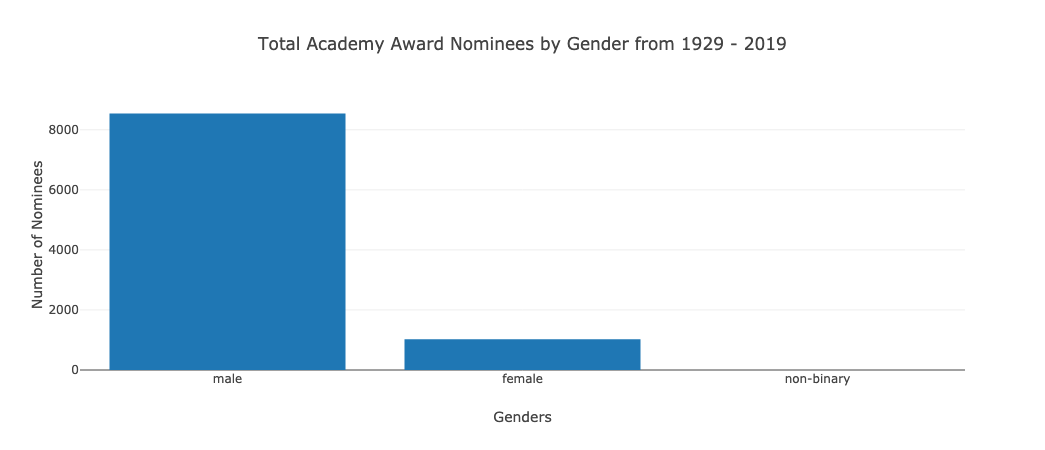

In [48]:
trace = go.Bar(
            x=["male", "female", "non-binary"],
            y=[oscar_nominees.gender.value_counts()["male"],
               oscar_nominees.gender.value_counts()["female"],
               oscar_nominees.gender.value_counts()["non-binary"]
              ]
)
data = [trace]    
layout = go.Layout(title="Total Academy Award Nominees by Gender from 1929 - 2019",
                   xaxis=dict(title="Genders"), 
                   yaxis=dict(title="Number of Nominees"))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Gender Counts for Nominees by Year

In [53]:
years = oscar_nominees.year.values
years

array([1948, 1941, 1995, ..., 1950, 1945, 1957])

In [63]:
sample_years = years
sample_years

array([1948, 1941, 1995, ..., 1950, 1945, 1957])

In [64]:
male_nominees.year.value_counts()[1948]

94

In [74]:
something = oscar_nominees.groupby('gender').year[1930]
something

IndexError: Column(s) year already selected

In [66]:
male_nominees.year.value_counts()[1949]

83

In [67]:
male_counts = 0
female_counts = 0
non_binary_counts = 0

for y in sample_years:
    if male_nominees.year.value_counts()[y]:
        male_counts += male_nominees.year.value_counts()[y]
    else:
        male_counts += 0
    if female_nominees.year.value_counts()[y]:
        female_counts += female_nominees.year.value_counts()[y]
    else:
        female_nominees += 0
#     if non_binary_nominees.year.value_counts()[y]:
#         non_binary_counts += non_binary_nominees.year.value_counts()[y]
#     else:
#         non_binary_counts += 0
        
print(male_counts)
print(female_counts)
# print(non_binary_counts)

KeyError: 1930

In [62]:
non_binary_nominees.year.value_counts()

2016    1
Name: year, dtype: int64

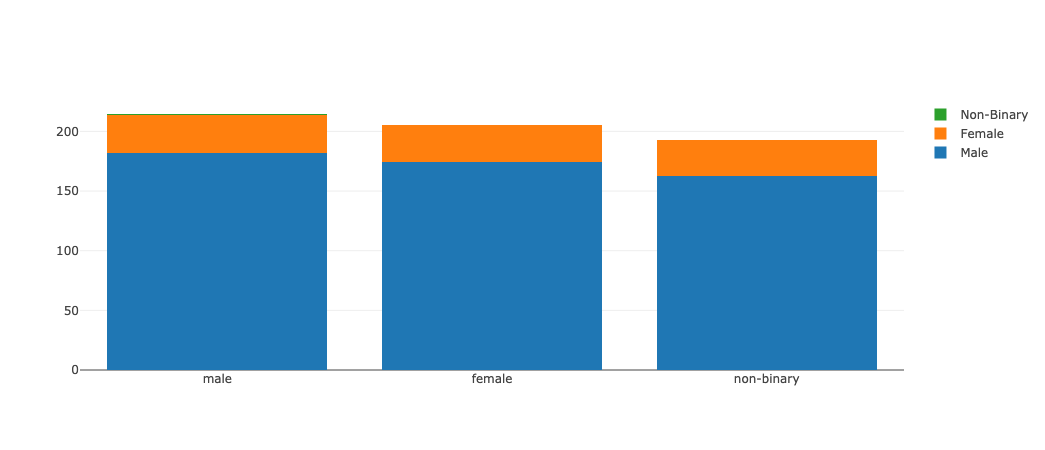

In [52]:
genders = ["male", "female", "non-binary"]
male_counts_by_year = male_nominees.year.value_counts()
female_counts_by_year = female_nominees.year.value_counts()
non_binary_counts_by_year = non_binary_nominees.year.value_counts()

trace1 = go.Bar(
    x=genders,
    y=male_counts_by_year,
    name="Male"
)
trace2 = go.Bar(
    x=genders,
    y=female_counts_by_year,
    name="Female"
)

trace3 = go.Bar(
    x=genders,
    y=non_binary_counts_by_year,
    name="Non-Binary"
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)